# CS 156a - Problem Set 5

## Patrone Samuel, 2140749

The following notebook is publicly available at https://github.com/spatrone/CS156A-Caltech.git.

## Problem 1

### Answer: [c] $100$

### Derivation:

The expected value on a data set $\mathcal{D}$ of $N$ samples of in-sample error for a noisy target function with variance $\sigma^2$ using linear regression in $d$ dimension is

\begin{equation}
\mathbb{E}_{\mathcal{D}}[E_{in}]=\sigma^2\left(1-\frac{d+1}{N}\right)\,.
\end{equation}

For $\sigma=0.1$, $d=8$ and $\mathbb{E}_{\mathcal{D}}[E_{in}]\ge 0.008$, we need at least 

\begin{equation}
N\ge\frac{d+1}{\left(1-\frac{\mathbb{E}_{\mathcal{D}}[E_{in}]}{\sigma^2}\right)}=\frac{9}{\left(1-\frac{0.008}{(0.1)^2}\right)}=45\,.
\end{equation}


In [16]:
def expEmin(N,sigma=0.1,d=8):
    return sigma**2*(1-(d+1)/N)

print(f'For N=45, we get an expected value for E_min of {expEmin(45):.3f}')

For N=45, we get an expected value for E_min of 0.008


## Problem 2

### Answer: [d] $ \tilde{\omega}_1<0,\; \tilde{\omega}_2>0 $

### Derivation:

A hyperbola is the set of points in a plane whose distances from two fixed points, called foci, has an absolute difference that is equal to a positive constant. In formulae:

\begin{equation}
f(x_1,x_2)=x_1^2-x_2^2-r^2=0\,,
\end{equation}

where we assumed that the center is the origin of the coordinates $(0,0)$, the hyperbola is equilateral, i.e. the asymptotes have unitary slopes, and $r\in \mathbb{R}$. The general case can be addressed by shifting the origin and/or rescaling the coordinates.

In the $\mathcal{Z}$ space, the point are classified by the sign of the following function:

\begin{equation}
\label{Zbounds}
{\rm sgn}\left(\tilde{\omega}_0\Phi(x_0)+\tilde{\omega}_1 \Phi(x_1)+\tilde{\omega}_2 \Phi(x_2)\right)={\rm sgn}\left(\tilde{\omega}_0+\tilde{\omega}_1 x_1^2+\tilde{\omega}_2 x_2^2\right)\,.
\end{equation}

In $\mathcal{X}$ space, a generic sample $(x_1,x_2)$ is labelled by computing ${\rm sgn}{(-f(x_1,x_2))}$, as illustrated in the following plot. In order to agree with the decision boundary in Eq.\eqref{Zbounds}, i.e.

\begin{equation}
{\rm sgn}\left(\tilde{\omega}_0+\tilde{\omega}_1 x_1^2+\tilde{\omega}_2 x_2^2)\right)={\rm sgn}(r^2-x_1^2+x_2^2)
\end{equation}

we impose the following sets of constraints on the weights $\tilde{\omega}$:

\begin{equation}
\tilde{\omega}_0>0,\; \tilde{\omega}_1<0,\; \tilde{\omega}_2>0\,.
\end{equation}

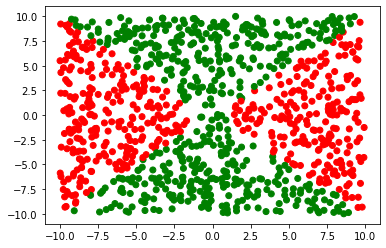

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def gen_uniform_points(N,d=2,vmin=[-1,-1],vmax=[1,1]):
    if(d!=len(vmin)|d!=len(vmax)): 
        raise Exception('WARNING: Boundary values do not match the dimensionality of the problem!')
    return np.random.uniform(low=vmin,high=vmax,size=(N,d))

def label_hyperbolic(pts, a=1,b=1,r=1):
    return [-np.sign(pts[i][0]*pts[i][0]/a**2-pts[i][1]*pts[i][1]/b**2-r**2) for i in range(len(pts))]

def color_pts(label):
    #green is +1, red is -1
    col=[]
    for i in range(len(label)):
        if(label[i]>0): col.append('green')
        else: col.append('red')
    return col

N=1000
pts=gen_uniform_points(N,vmin=[-10,-10],vmax=[10,10])
label=label_hyperbolic(pts)
plt.scatter(pts[:,0],pts[:,1], color=color_pts(label))
plt.show()

## Problem 3

### Answer: [c] $15$

### Derivation:

Let's consider the general $\mathcal{Q}$th order polynomial transform $\Phi_\mathcal{Q}$ for the space $\mathcal{x}=\mathbb{R}^d$. We can find the dimensionality $\tilde{d}$ of the feature space $\mathcal{Z}$ by observing that we can form $C(d,k)$ different monomials of order $k$ from the $d$ initial coordinates, where 

\begin{equation}
C(d,k)={d+k-1 \choose k}\,.
\end{equation}

Since $\Phi_\mathcal{Q}$ will have all possible monomials up to order $\mathcal{Q}$ as transformed coordinates, the feature space $\mathcal{Z}$ will have a dimensionality

\begin{equation}
\tilde{d}(Q,d)=\sum^Q_{k=1}{d+k-1 \choose k}\,.
\end{equation}

For $d=2$, we get

\begin{equation}
\tilde{d}(Q,2)=\sum^Q_{k=1}{k+1 \choose k}= \sum^Q_{k=1} k+1 = \frac{Q(Q+3)}{2} \,.
\end{equation}

The VC dimension of the set of the hypothesis in $\mathcal{Z}$ $d_{VC}(\mathcal{H}_{\Phi})$ can be as high as the VC dimension of a linear model in the transformed space, in formulae:

\begin{equation}
d_{VC}(\mathcal{H}_{\Phi})\le\tilde{d}+1\,.
\end{equation}

For the case examined here, $Q=4$, hence $d_{VC}(\mathcal{H}_{\Phi})\le \tilde{d}(4,2)+1=15$.

## Problem 4

### Answer: [e] $2(ue^v-2ve^{-u})(e^v+2ve^{-u})$

### Derivation:

\begin{align}
\begin{split}
\frac{\partial E(u,v)}{\partial u}=&2(ue^v-2ve^{-u})\frac{\partial}{\partial u}(ue^v-2ve^{-u})\\ =&2(ue^v-2ve^{-u})(e^v+2ve^{-u})\,.
\end{split}
\end{align}

## Problems 5-6

### Answers: [d] $10$ ,  [e] $[0.045,0.024]$

### Code:

In [65]:
import math as m

def E(w):
    u=w[0]
    v=w[1]
    return np.double((u*m.e**v - 2*v*m.e**(-u))**2)

def gradE(w):
    u=w[0]
    v=w[1]
    duE=np.double(2*(u*m.e**v-2*v*m.e**(-u))*(m.e**v+2*v*m.e**(-u)))
    dvE=np.double(2*(-2*m.e**(-u)+m.e**v*u)*(m.e**v*u - 2*m.e**(-u)*v))
    return np.array([duE,dvE])

def grad_step(w,grad,eta):
    return w-eta*grad(w)

def grad_desc(E,gradE,Emin,init,eta=0.1,print_ans=True):
    w=init
    Niter=0
    while(E(w)>Emin):
        w=grad_step(w,gradE,eta)
        Niter=Niter+1
    if(print_ans==True):
        print(f'After {Niter} iterations, we found a minimum of the function at [{w[0]:.3f},{w[1]:.3f}] with error value of {E(w):.2e}')
    return w,Niter

eps=np.double(10**(-14))
startpt=np.array([1,1])
w,Niter=grad_desc(E,gradE,eps,startpt)

After 10 iterations, we found a minimum of the function at [0.045,0.024] with error value of 1.21e-15


## Problem 7

### Answer: [a] $10^{-1}$

### Code:

In [74]:
def grad_step_coord(w,gradE,eta):
    ustep=w[0]-eta*gradE(w)[0]
    w=np.array([ustep,w[1]],dtype=np.double)
    vstep=w[1]-eta*gradE(w)[1]
    return np.array([ustep,vstep],dtype=np.double)

def grad_desc_coord(E,gradE,max_ite,init,eta=0.1,print_ans=True):
    w=init
    Niter=0
    while(Niter<max_ite):
        w=grad_step_coord(w,gradE,eta)
        Niter=Niter+1
    if(print_ans==True):
        print(f'After {Niter} iterations, we found a minimum of the function at [{w[0]:.3f},{w[1]:.3f}] with error value of {E(w):.2e}')
    return w,Niter

w,Niter=grad_desc_coord(E,gradE,15,startpt)

After 15 iterations, we found a minimum of the function at [6.297,-2.852] with error value of 1.40e-01
